# Imputing Missing Data
Using the three methods we landed on:
- Mutliple Iterations with Chained Equations
- missForest
- Autoregressive Integrated Moving Average

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../')

from src.visualization import visualize
from src.processing import impute

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap

import seaborn as sns

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import scipy
import math
import statsmodels.api as sm

from datetime import datetime, timedelta

# Data Import
For each imputation method, we have two datasets we consider:
1. Example data to test the accuracy of the model
2. Remaining participant data that we can apply the model to. 

In [16]:
imp = impute.Impute("rnse61g4","../",prompt=True,consecutive=True)

Percent: 30
Parameter: co2
Period (in minutes): 120


## Missing Data

In [17]:
imp.missing.head()

,pm2p5_mass,tvoc,temperature_c,co,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,10.473964,NaN
2020-06-11 13:54:00,22.796582,NaN,24.077255,10.238979,NaN
2020-06-11 13:56:00,22.721861,129.038577,24.113462,10.011310,NaN
2020-06-11 13:58:00,22.634113,131.539410,24.146652,9.795315,NaN
2020-06-11 14:00:00,22.695872,133.807650,24.177187,9.595961,NaN


## Base Data
Same dataset with nothing missing - to compare against.

In [18]:
imp.base.head()

,tvoc,co2,co,pm2p5_mass,temperature_c,rh
timestamp,,,,,,
2020-06-11 13:52:00,123.859636,1412.201879,10.473964,22.713558,24.037599,42.064286
2020-06-11 13:54:00,126.481339,1411.594738,10.238979,22.796582,24.077255,42.061364
2020-06-11 13:56:00,129.038577,1410.994147,10.011310,22.721861,24.113462,42.058696
2020-06-11 13:58:00,131.539410,1410.628738,9.795315,22.634113,24.146652,42.056250
2020-06-11 14:00:00,133.807650,1409.933588,9.595961,22.695872,24.177187,42.054000


---

# Imputing

## MICE

In [19]:
imp.mice()

In [20]:
imp.mice_imputed.head()

,pm2p5_mass,tvoc,temperature_c,co,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,10.473964,1795.583880
2020-06-11 13:54:00,22.796582,333.955915,24.077255,10.238979,1871.309942
2020-06-11 13:56:00,22.721861,129.038577,24.113462,10.011310,1749.577630
2020-06-11 13:58:00,22.634113,131.539410,24.146652,9.795315,1728.059629
2020-06-11 14:00:00,22.695872,133.807650,24.177187,9.595961,1707.945544


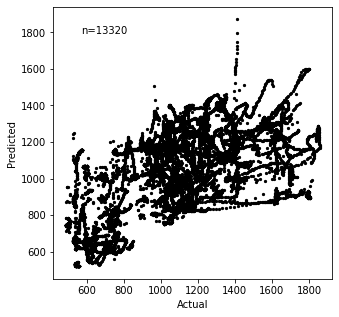

(0.3154099823157267, 219.76141180543743, 280.1556665088201, 0.7076736242908568)

In [21]:
imp.evaluate(imp.mice_imputed,plot=True)

## missForest

In [22]:
imp.miss_forest()

In [23]:
imp.rf_imputed.head()

,pm2p5_mass,tvoc,temperature_c,co,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,10.473964,1150.066756
2020-06-11 13:54:00,22.796582,341.970468,24.077255,10.238979,1659.301281
2020-06-11 13:56:00,22.721861,129.038577,24.113462,10.011310,1152.601069
2020-06-11 13:58:00,22.634113,131.539410,24.146652,9.795315,1132.292550
2020-06-11 14:00:00,22.695872,133.807650,24.177187,9.595961,1136.460045


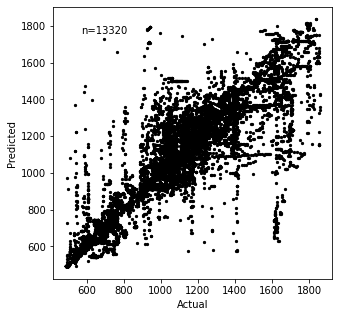

(0.7802624176503159, 90.17841122912012, 158.7216980012167, 0.9384144405304699)

In [24]:
imp.evaluate(imp.rf_imputed,plot=True)

## ARIMA

In [25]:
imp.arima(order=(2,1,2))

In [26]:
imp.arima_imputed.head()

,pm2p5_mass,tvoc,temperature_c,co,co2
timestamp,,,,,
2020-06-11 13:52:00,22.713558,123.859636,24.037599,10.473964,1031.462346
2020-06-11 13:54:00,22.796582,NaN,24.077255,10.238979,1031.462346
2020-06-11 13:56:00,22.721861,129.038577,24.113462,10.011310,1031.462346
2020-06-11 13:58:00,22.634113,131.539410,24.146652,9.795315,1031.462346
2020-06-11 14:00:00,22.695872,133.807650,24.177187,9.595961,1031.462346


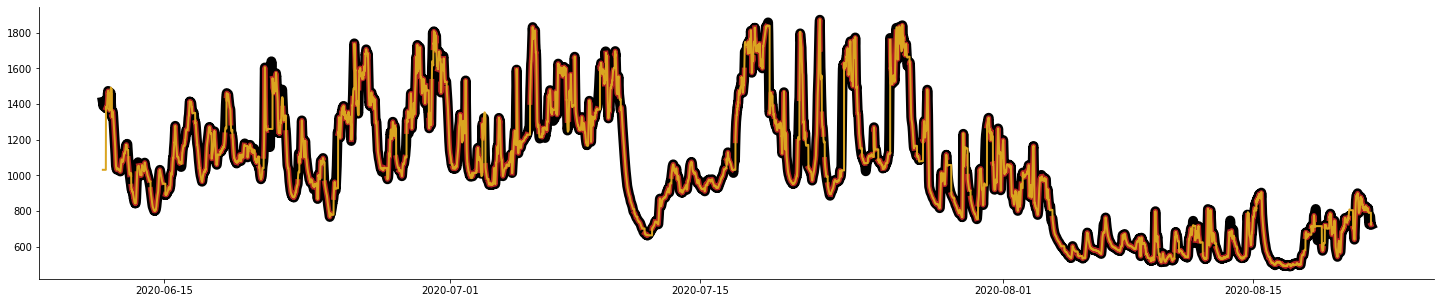

In [27]:
imp.compare_ts(imp.arima_imputed)

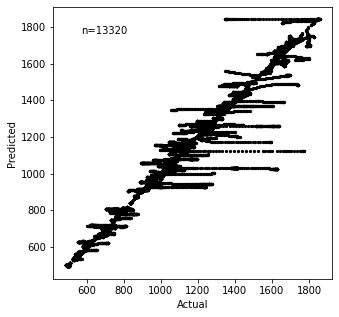

(0.9269597777454287, 46.168983994819065, 91.5092873044489, 0.980957695705827)

In [28]:
imp.evaluate(imp.arima_imputed,plot=True)

# Evaluating

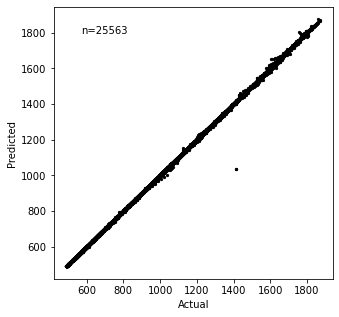

(0.9998635296048589, 0.8687741456554824, 3.908780849883841, 0.9999658834315857)

In [14]:
imp.evaluate(imp.arima_imputed,plot=True)

---

# Simulating
Now we can run through multiple iterations of missing data to get a sense of the model's performance.

## Missing at Random

/Users/hagenfritz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


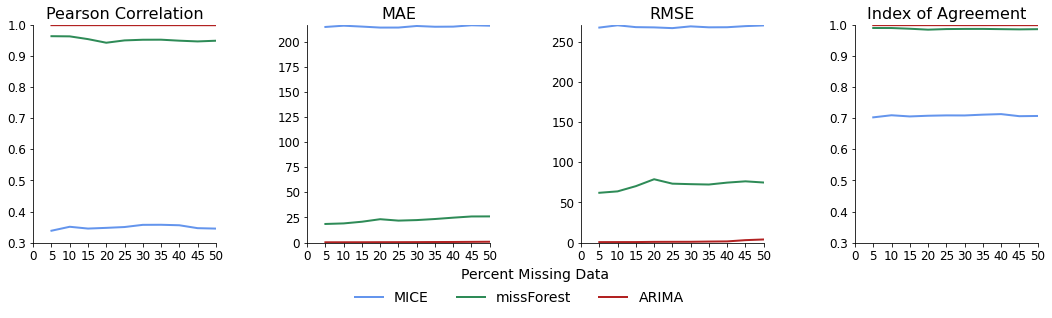

/Users/hagenfritz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/hagenfritz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


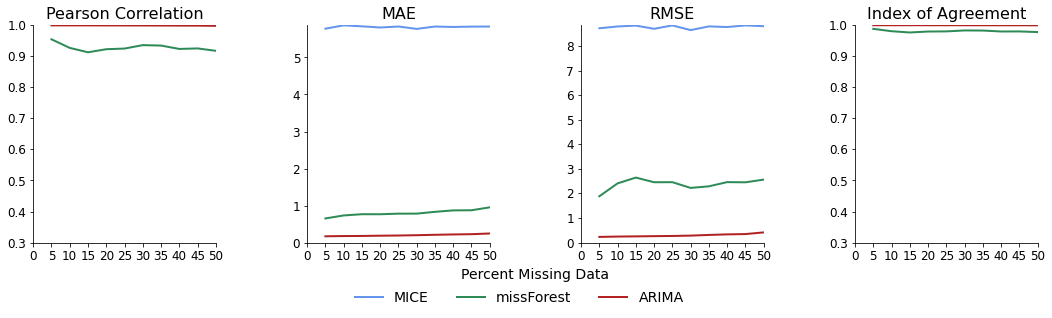

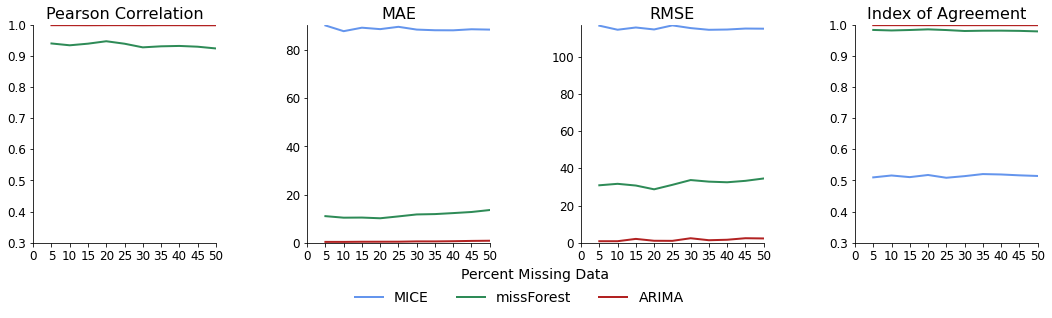

/Users/hagenfritz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


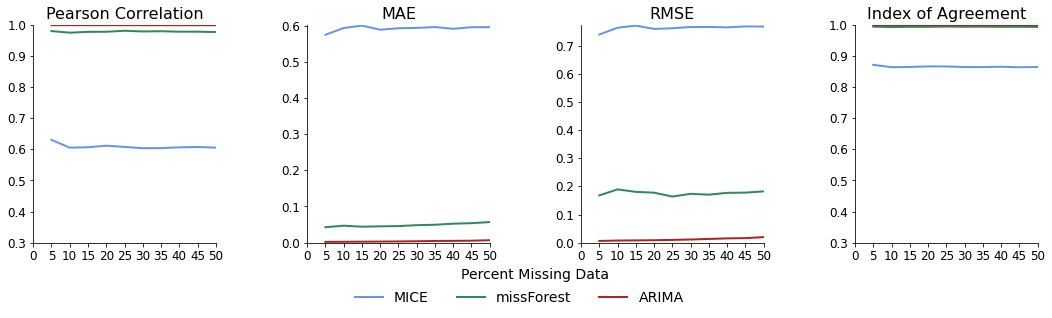

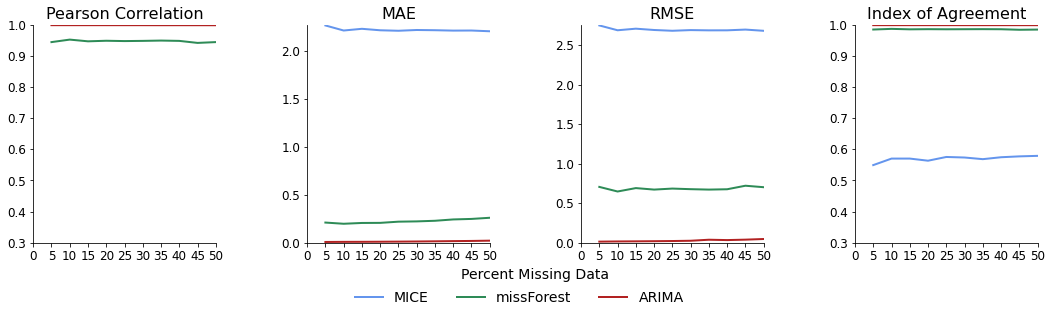

In [32]:
for param in ["co2","pm2p5_mass","tvoc","temperature_c","rh"]:
    res = imp.run_at_random(param=param)
    imp.compare_methods(res,save=True,annot=param)

<div class="alert-block alert alert-success">
    
missForest seems to be the best at least before looking into GANs
    
</div>

## Missing Periods

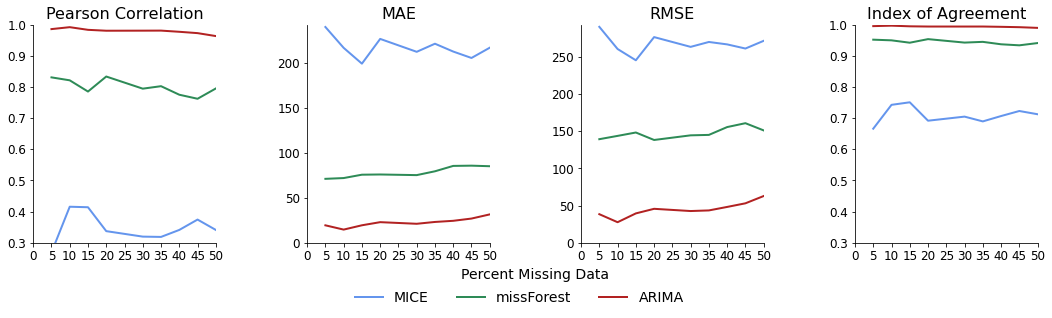

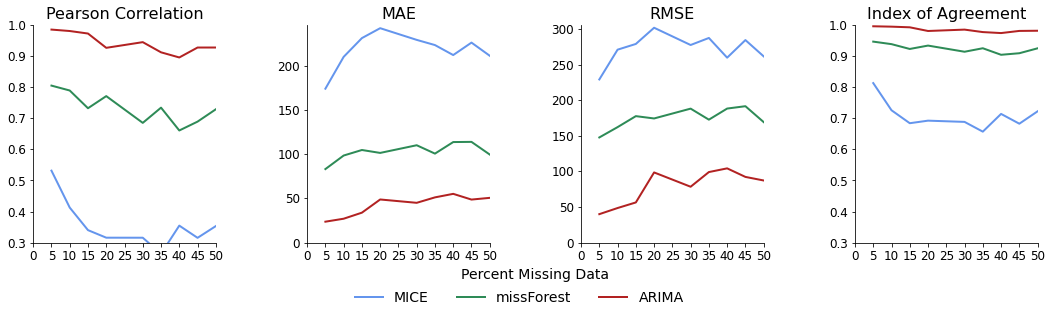

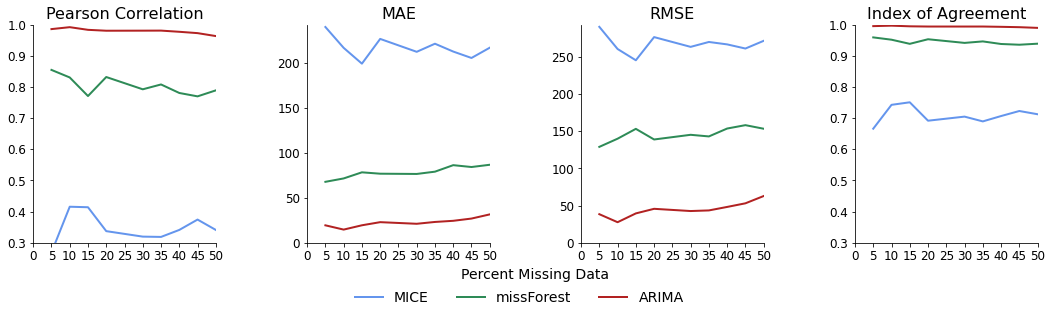

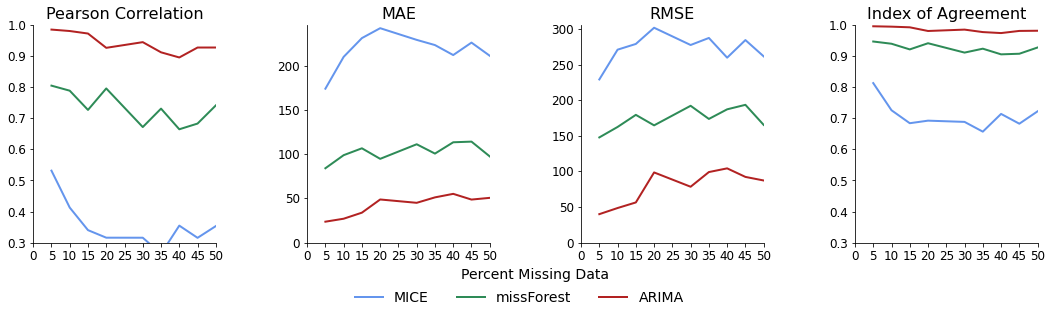

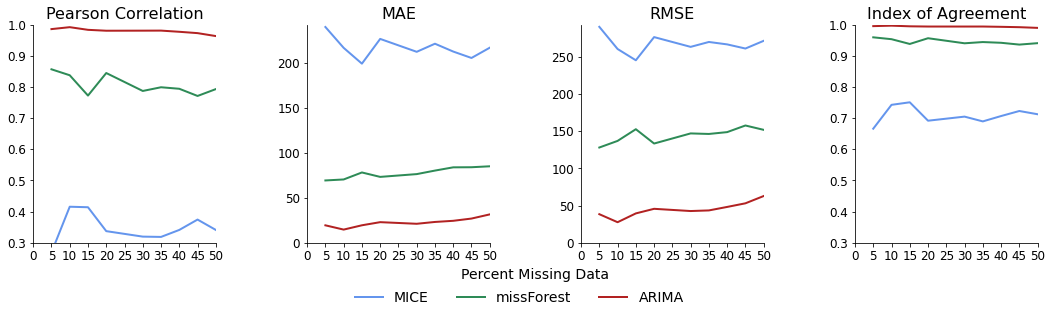

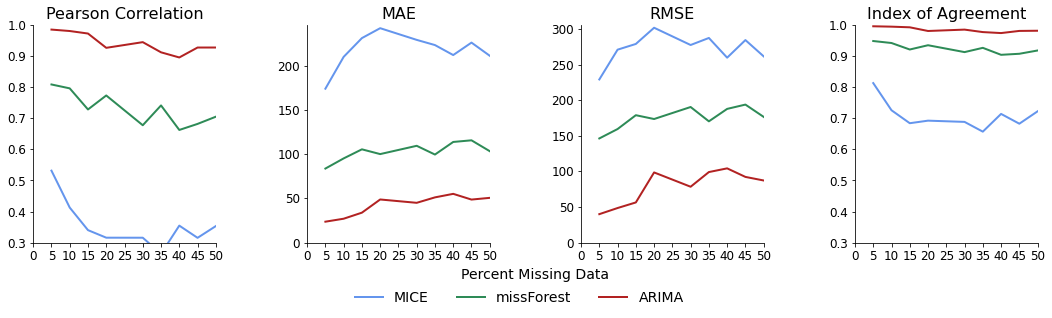

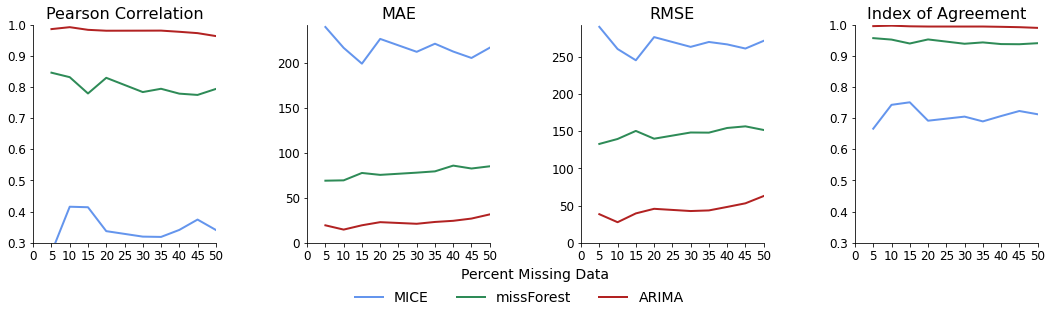

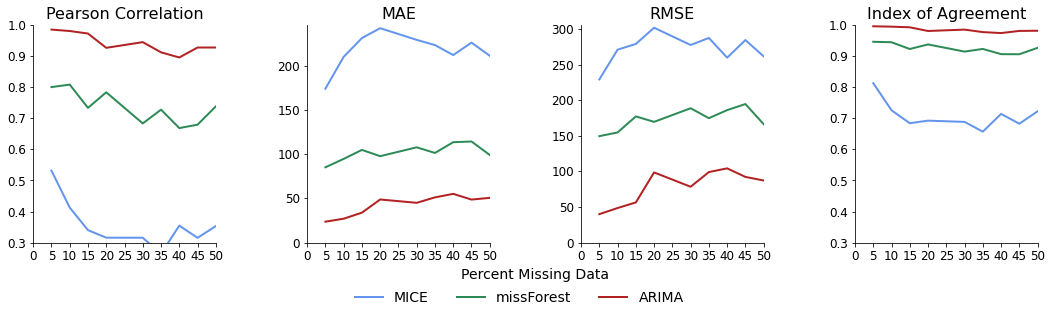

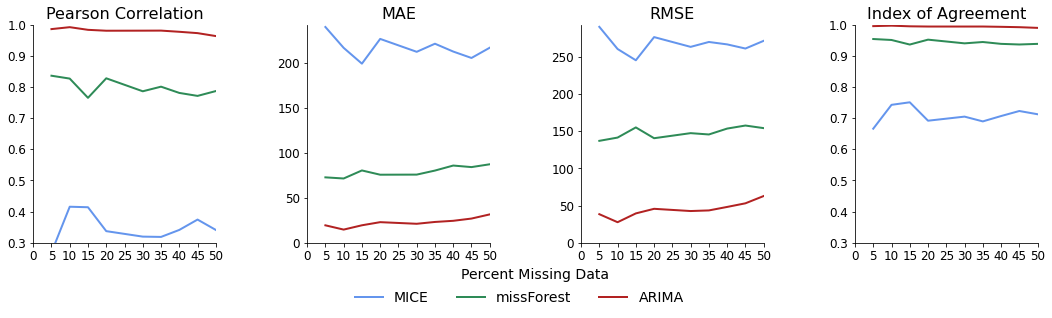

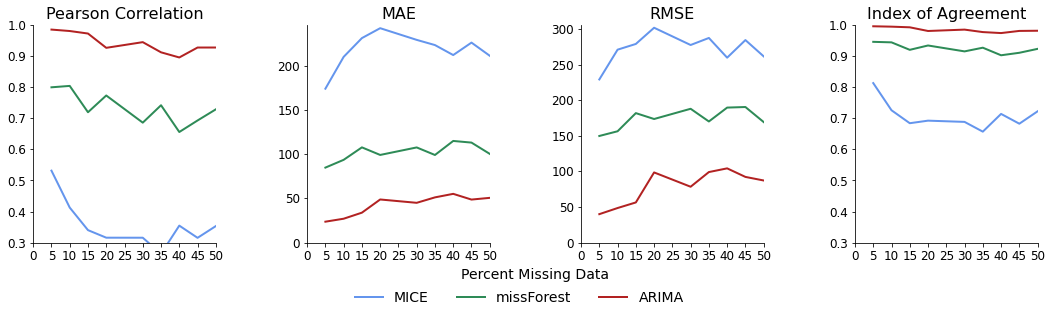

In [33]:
for param in ["co2","pm2p5_mass","tvoc","temperature_c","rh"]:
    for period in [60,120]:
        res = imp.run_periods_at_random(period=period)
        imp.compare_methods(res,save=True,annot=f"{param}_{period}")